# BANK CUSTOMER CHURN 🏦

## About

The customer churn dataset is a collection of customer data that focuses on predicting customer churn, which refers to the tendency of customers to stop using a company's products or services. The dataset contains various features that describe each customer, such as their credit score, country, gender, age, tenure, balance, number of products, credit card status, active membership, estimated salary, and churn status. The churn status indicates whether a customer has churned or not. The dataset is used to analyze and understand factors that contribute to customer churn and to build predictive models to identify customers at risk of churning. The goal is to develop strategies and interventions to reduce churn and improve customer retention.


Obs: This dataset is taken from: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset


In [37]:
# Python Version
from platform import python_version
print('Python version: ', python_version())

Python version:  3.9.16


In [82]:
# Imports

## Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import missingno
%matplotlib inline
from pathlib import Path

# Statistics
from scipy.stats import chi2_contingency

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [39]:
# Package versions
%reload_ext watermark
%watermark -a "Cézar Mendes" --iversions

Author: Cézar Mendes

pandas    : 1.5.3
matplotlib: 3.7.1
numpy     : 1.24.3
missingno : 0.5.1
sys       : 3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]
seaborn   : 0.12.2
scipy     : 1.10.1



In [40]:
df = pd.read_csv('../data/Prep_BankCustomerChurn.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


### Business Problem: Customer Churn Prediction and Retention

> What is the overall churn rate in the dataset?

In [41]:
churn_rate_true = df['churn'].value_counts(normalize=True)[1] * 100
print(f'Churn rate is: {churn_rate_true:.2f}%')

Churn rate is: 20.37%


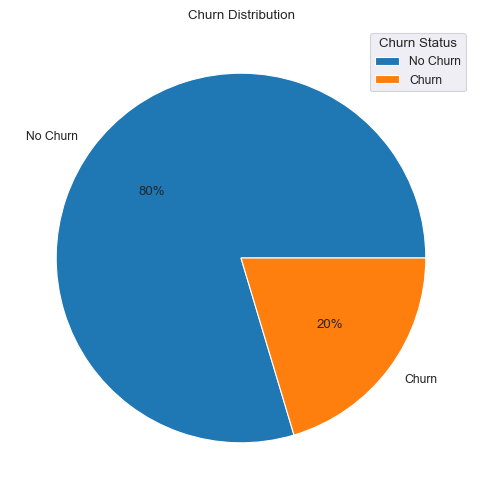

In [42]:
# Pie Chart
colors = sns.color_palette('tab10')
plt.figure(figsize=(8, 6))

# Get value counts of 'churn'
churn_counts = df['churn'].value_counts()

labels = ['No Churn', 'Churn']
plt.pie(churn_counts, labels=labels, colors=colors, autopct='%.0f%%')

plt.title('Churn Distribution')
plt.legend(labels, title="Churn Status", loc="upper right")
plt.show()

> How does the churn rate vary by different customer demographics, such as gender and country?

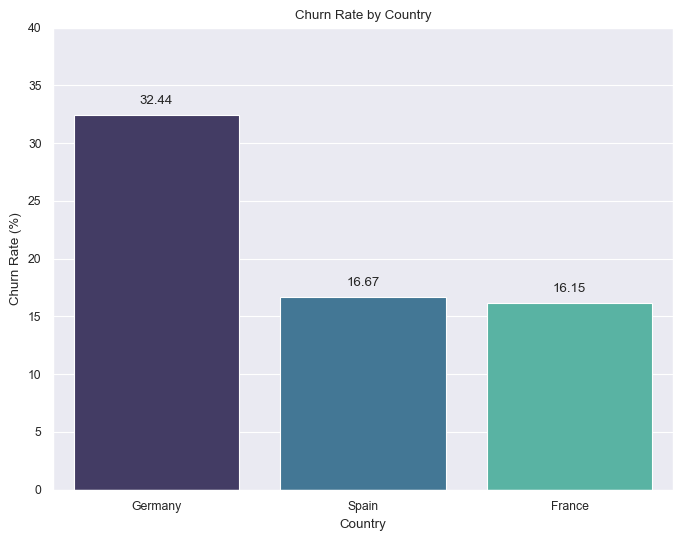

In [43]:
# Bar plot

# Region/Country
# Calculate churn rate by country
churn_rate_by_country = df[df['churn'] == 1].groupby('country')['churn'].count() / df.groupby('country')['churn'].count() * 100

# Convert series to DataFrame for seaborn
churn_rate_df = churn_rate_by_country.reset_index().rename(columns={'churn':'churn_rate'}).sort_values('churn_rate', ascending= False)

# Create the barplot
sns.set_theme(style="darkgrid")
sns.set_context('paper')
plt.figure(figsize=(8, 6))
ax = sns.barplot(y='churn_rate', x='country', data=churn_rate_df, palette='mako')
ax.set_ylim(top = 40)
plt.ylabel('Churn Rate (%)')
plt.xlabel('Country')
plt.title('Churn Rate by Country')

# Add bar labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()


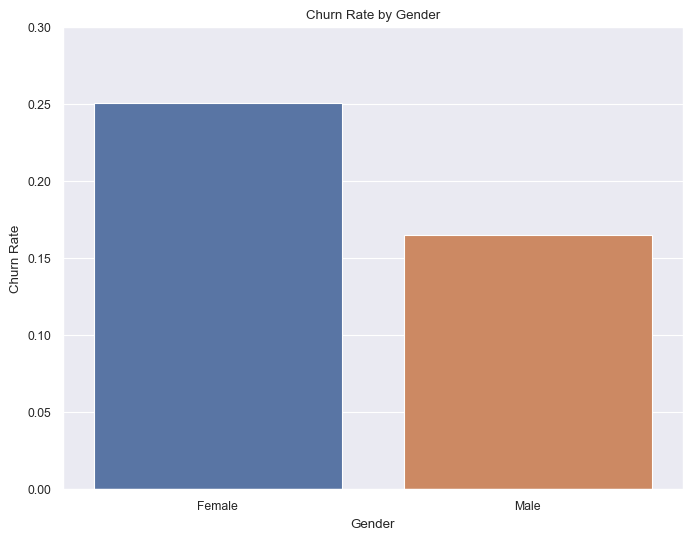

In [81]:
# Gender 
# Gender labels for the plot
gender_labels = ['Female', 'Male']

# Calculate the churn rate by gender
gender_churn_rate = df.groupby('gender')['churn'].mean()

sns.set_theme(style="darkgrid")
sns.set_context('paper')
# Plotting the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=gender_churn_rate.index, y=gender_churn_rate.values)
plt.xticks(ticks=[0, 1], labels=gender_labels)
ax.set_ylim(top = 0.3)
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Gender')
plt.show()



> Are there any specific age groups more prone to churn?

A: Yes, 35-44 and 45-54.

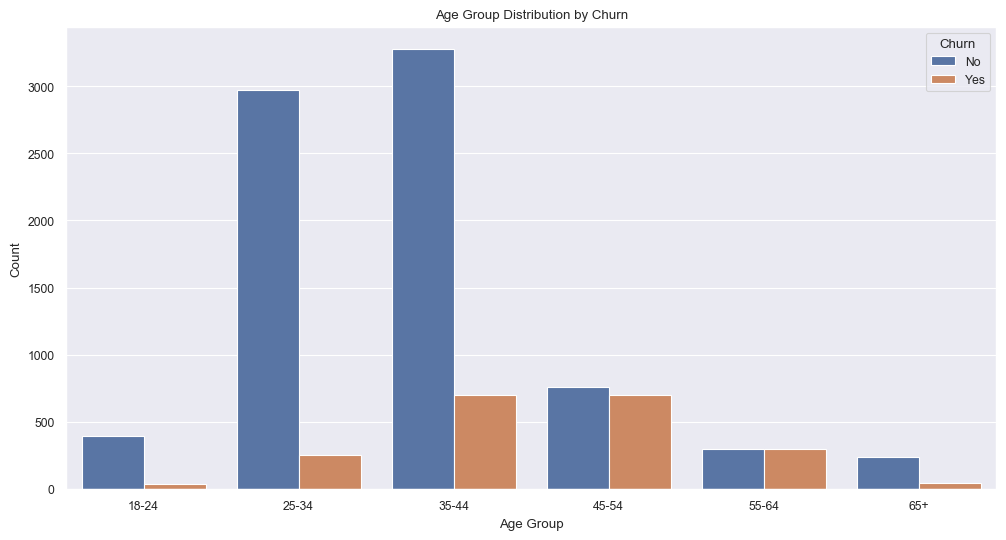

In [46]:
# Define the bins for age groups
bins = [18, 24, 34, 44, 54, 64, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create a new column for age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

sns.set_theme(style="darkgrid")
sns.set_context('paper')

plt.figure(figsize=(12, 6))
sns.countplot(x='age_group', hue='churn', data=df)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution by Churn')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

> What is the average tenure of customers who churned compared to those who didn't?

In [54]:
average_tenure = df.groupby('churn')['tenure'].mean()

print("Average tenure for customers who churned: {:.2f}".format(average_tenure[1]))
print("Average tenure for customers who did not churn: {:.2f}".format(average_tenure[0]))


Average tenure for customers who churned: 4.93
Average tenure for customers who did not churn: 5.03


> Do customers with higher credit scores tend to churn less?

A: No, only those that are close to the average credit score

In [66]:
average_credit_score = df.groupby('churn')['credit_score'].mean()
print("Average credit score for customers who churned: {:.2f}".format(average_credit_score[1]))
print("Average credit score for customers who did not churn: {:.2f}".format(average_credit_score[0]))

Average credit score for customers who churned: 645.35
Average credit score for customers who did not churn: 651.85


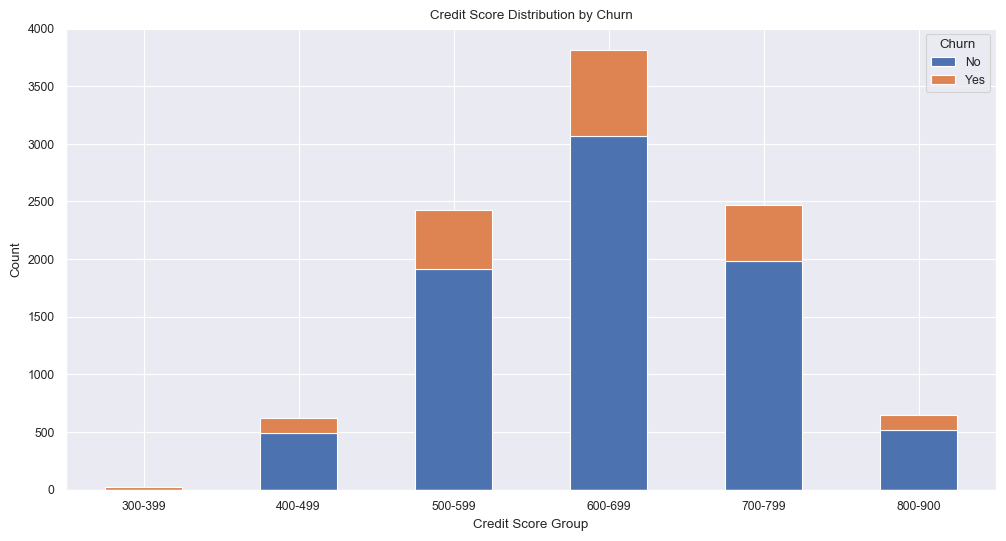

In [67]:
bins = [300, 400, 500, 600, 700, 800, 900]
labels = ['300-399', '400-499', '500-599', '600-699', '700-799', '800-900']
df['credit_score_group'] = pd.cut(df['credit_score'], bins=bins, labels=labels)


credit_score_counts = df.groupby(['churn', 'credit_score_group']).size().unstack(level=0, fill_value=0)

# Graph
credit_score_counts.plot(kind='bar', stacked=True, figsize=(12, 6), rot=0)
plt.xlabel('Credit Score Group')
plt.ylabel('Count')
plt.title('Credit Score Distribution by Churn')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()



> Is there a correlation between account balance and churn rate?

A: Looking at the result below, a correlation of 0.12% means that changes in the account balance are very weakly associated with changes in the churn rate, and this relationship is unlikely to be meaningful or significant in practice.

In [73]:
correlation = df['balance'].corr(df['churn'])
print("Correlation between account balance and churn rate:{:.2f}%".format(correlation))


Correlation between account balance and churn rate:0.12%


> Does the credit card status impact churn rate significantly?

Based on the result below, credit card status does not appear to have a significant impact on churn rate in your dataset.

In [83]:
# Create a contingency table
contingency_table = pd.crosstab(df['credit_card'], df['churn'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print("p-value:", p)


p-value: 0.49237236141554686


# Conclusion

Although the dataset is unbalanced, containing more people who remained in the bank than left, the focus of the business strategy is focused on people who left or who may cease to be customers.
So maybe regularly engaging with customers and seeking feedback can help in the early identification of dissatisfaction or issues that may lead to churn.